In [3]:
pip install pandas

  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.9 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 817.1 kB/s eta 0:00:00
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.5 MB 2.4 MB/s eta 0:00:07
   ---------------------------------------- 0.1/16.5 MB 2.4 MB/s eta 0:00:07
   ---------------------------------------- 0.2/16.5 MB 919.0 kB/s eta 0:00:18
   ---------------------------------------- 0.2/16.5 MB 958

In [3]:
import pandas as pd

Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [88]:
data = pd.read_csv("D:\MLOPS\MLOPS_All_In_One\data\diamonds.csv")

In [89]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
data['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [71]:
data.isnull().sum()
# no null values


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [72]:
data.shape

(53940, 10)

In [73]:
data.size

539400

In [74]:
# check duplicated  values
data.duplicated().sum()

# oberservation: we got 146 duplicated values

np.int64(146)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [18]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# gather numerical features and categories features

In [90]:
num_features = data.columns[data.dtypes != "object"]

In [76]:
num_features

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [91]:
cat_features = data.columns[data.dtypes == "object"]

In [78]:
cat_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [23]:
data[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [24]:
data[cat_features]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [32]:
data[cat_features].nunique()

cut        5
color      7
clarity    8
dtype: int64

In [37]:
cat_features[:].unique()

Index(['cut', 'color', 'clarity'], dtype='object')

In [43]:
for col in cat_features:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [45]:
for col in cat_features:
    print(data[col].value_counts())
    print(f"here is the total count:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
here is the total count:5
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
here is the total count:7
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
here is the total count:8


In [47]:
!pip install seaborn
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------------------- ----------------- 92.2/165.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------- ----- 256.0/294.9 kB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 12.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 10.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/8.0 MB 10.4 MB/s eta 0:00:01
   ------ ------

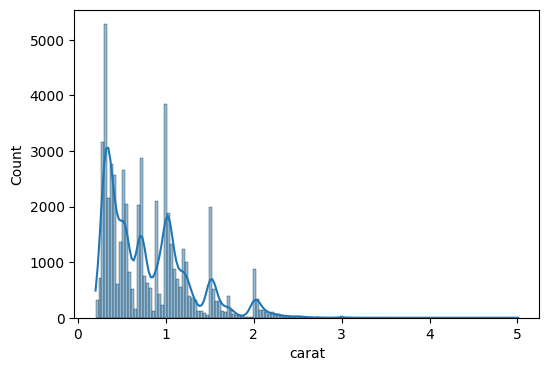

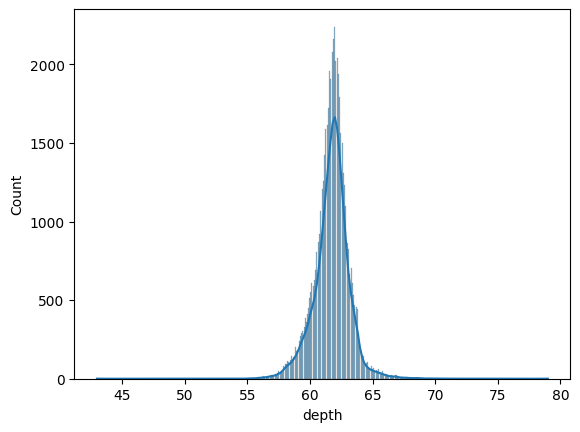

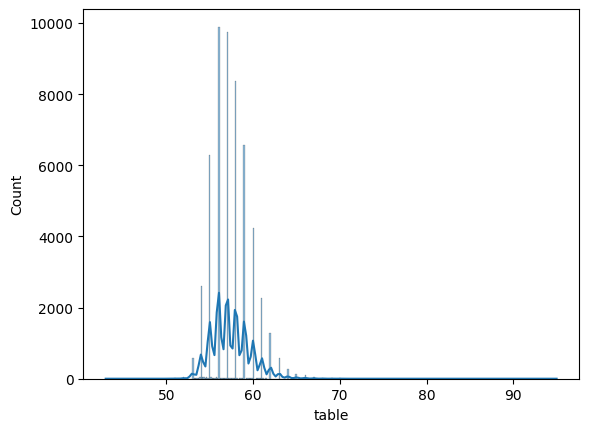

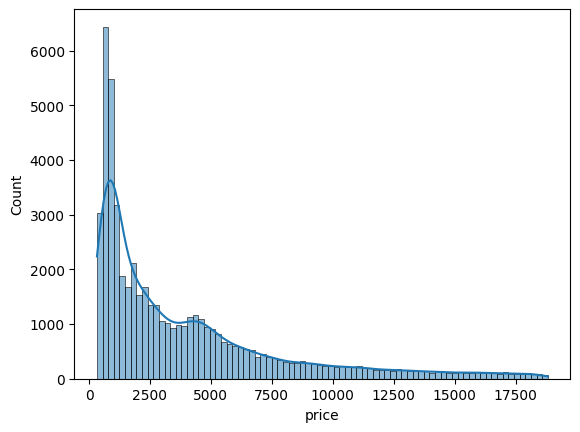

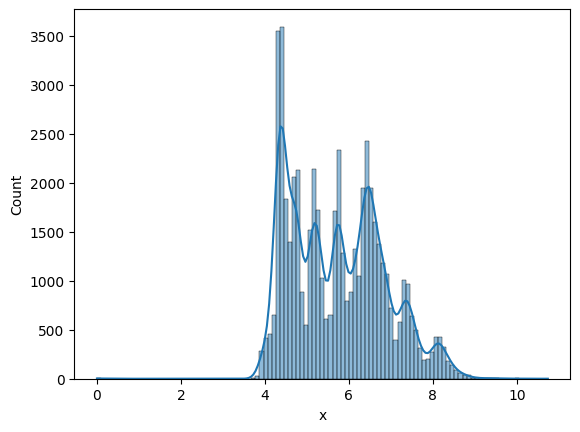

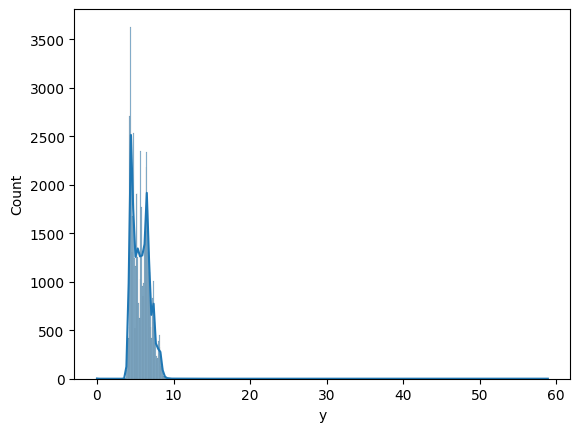

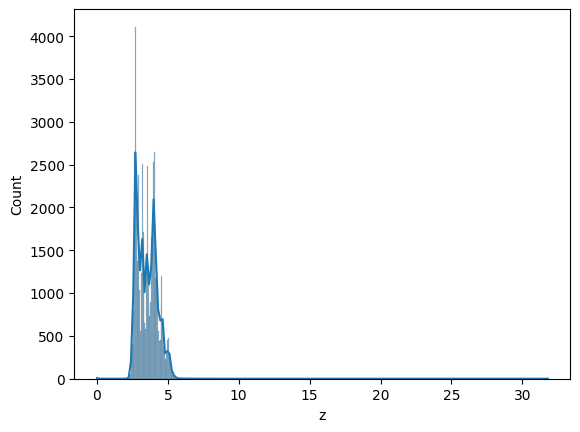

In [48]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in num_features:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [50]:
data[cat_features]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


<Axes: >

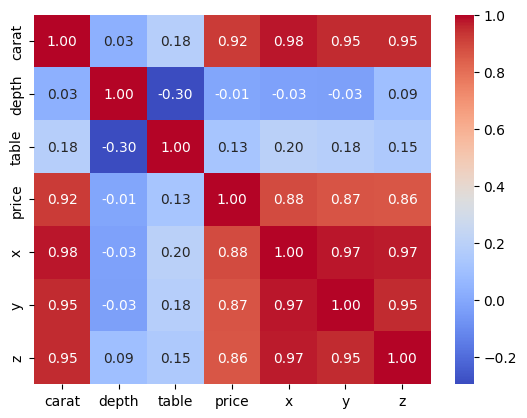

In [52]:
sns.heatmap(data[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Ordinal encoding

In [92]:

# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [80]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [93]:
data['cut'] = data['cut'].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [94]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74


# Handling Missing Values

In [61]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.0 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/11.0 MB 4.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11

In [95]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [96]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [98]:
x = data.drop(labels=["price"], axis=1)
y = data['price']

In [99]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,2,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,3,1,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,6.15,6.12,3.74


In [100]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [101]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.7 MB


In [102]:
x.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [103]:
y.isnull().sum()

np.int64(0)

#### observation: in our data there is no null values

#### right now we dont have the null values, what are the different techniques we were using to calculate the null values.


num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [ ]:

cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [ ]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
preprocessor.fit_transform(X_train)

In [ ]:
preprocessor.transform(X_test)

In [ ]:

preprocessor.get_feature_names_out()

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [104]:
## model training

## model training

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:

!pip install xgboost

In [ ]:

models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [ ]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [ ]:
list(models)

In [ ]:

for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

In [ ]:
models.keys()

In [ ]:
list(models.values())[1]

In [ ]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [ ]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")


In [ ]:

r2_list

In [ ]:

max(r2_list)